**The sinking of the Titanic is one of the most infamous shipwrecks in history.**

**On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.**

**While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.**

**In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)**

Google Colaboratory


Importing the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pllt
import seaborn as sns

Data Loading Preprocessing and Validation (EDA)

In [3]:
#EDA Code below 
a=pd.read_csv('Titanic-Dataset.csv')

a.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


MACHINE LEARNING (MODEL IMPLEMENTATION)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
a.shape

(891, 12)

891 rows and 12 columns

In [7]:
a.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The presence of null values in the age column requires changing before further steps. In this case we have taken the mean of the column to fill out the columns. Since the column 'Cabin' doesnt provide any significant value to our algorithms we will drop it.

In [8]:
mean_age=a['Age'].mean()

In [14]:
mean_age=mean_age.round()

In [15]:
print(mean_age)

30.0


In [16]:
a['Age'].fillna(value=mean_age,inplace=True)

In [17]:
a.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
a=a.drop('Cabin',axis=1)

In [21]:
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Other Info about the Dataset

In [70]:
a.groupby('Sex').size()

Sex
0    314
1    577
dtype: int64

In [25]:
a.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
a.corr()

<ipython-input-26-210c353a220b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


<ipython-input-27-ffc886177f1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr())


<Axes: >

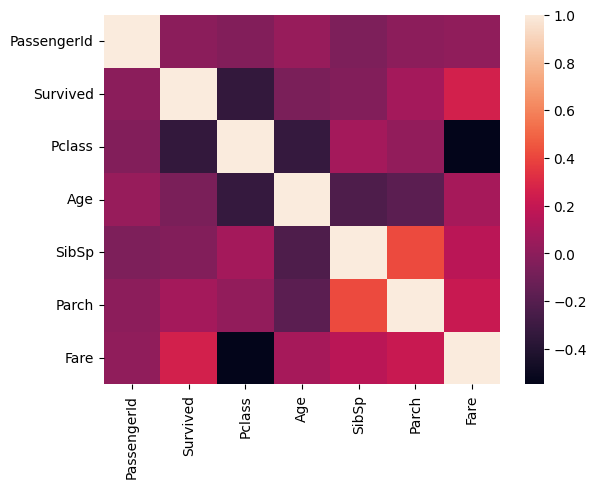

In [27]:
sns.heatmap(a.corr())

In [29]:
a.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**MACHINE LEARNING**

Splitting the dataset 

In [39]:
from sklearn import preprocessing

In [41]:
le=preprocessing.LabelEncoder()

In [43]:
a['Sex']=label_encoder.fit_transform(a['Sex'])
a['Sex'].unique()

array([1, 0])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x=a[['Sex','Age','Fare']]
y=a['Survived']

**Training the various models for comparison**

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)

*Logistic Regression*

In [51]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()

le.fit(x_train,y_train)



LogisticRegression()

In [53]:
Prediction = le.predict(x_train)
print(Prediction)

[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 0 1 0]


In [55]:
test_prediction=le.predict(x_test)
print(test_prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 1 1 0 1 0 0 

In [57]:
le.score(x_test, y_test)

0.7836538461538461

Accuracy of this model is 78.36

*Decision tree*

In [59]:
from sklearn import tree

In [60]:
dt=tree.DecisionTreeClassifier()

In [61]:
dt=dt.fit(x,y)

[Text(0.4162491508152174, 0.9761904761904762, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2879128344481605, 0.9285714285714286, 'x[2] <= 48.2\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.24304974916387959, 0.8809523809523809, 'x[2] <= 27.825\ngini = 0.447\nsamples = 225\nvalue = [76, 149]'),
 Text(0.2001463210702341, 0.8333333333333334, 'x[2] <= 25.698\ngini = 0.428\nsamples = 193\nvalue = [60, 133]'),
 Text(0.15447324414715718, 0.7857142857142857, 'x[2] <= 24.075\ngini = 0.453\nsamples = 167\nvalue = [58, 109]'),
 Text(0.09657190635451506, 0.7380952380952381, 'x[2] <= 10.481\ngini = 0.442\nsamples = 161\nvalue = [53, 108]'),
 Text(0.043478260869565216, 0.6904761904761905, 'x[2] <= 8.04\ngini = 0.489\nsamples = 66\nvalue = [28, 38]'),
 Text(0.026755852842809364, 0.6428571428571429, 'x[1] <= 30.25\ngini = 0.425\nsamples = 49\nvalue = [15, 34]'),
 Text(0.020066889632107024, 0.5952380952380952, 'x[2] <= 6.987\ngini = 0.386\nsamples = 46\nvalue = 

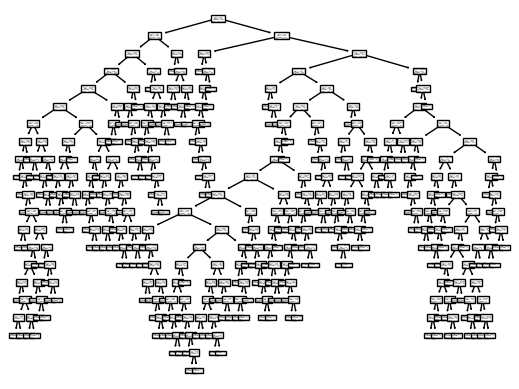

In [63]:
tree.plot_tree(dt)

In [66]:
prediction= dt.predict(x_train)
print (prediction)

[0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1
 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 1 0]


In [68]:
prediction2=dt.predict(x_test)
print(prediction2)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 1 1 0 1 

In [69]:
dt.score(x_test,y_test)

0.9775641025641025

Accuracy of Decison Tree Classifier is 97.75

In [77]:
scores = {
    'Logistic Regression': [78.36],
    'Decision Tree': [97.75],
}

In [79]:
print(scores)

{'Logistic Regression': [78.36], 'Decision Tree': [97.75]}


In [80]:
df = pd.DataFrame(scores)
  
# displaying the DataFrame
df.style

,Logistic Regression,Decision Tree
0,78.360000,97.750000


**Since Decision Tree poses a higher accuracy level than than of Logistic Regression , it means that it works better with the data as compared to the regression model. Hence Decision Tree will be our model to be used for deployment.**